In [34]:
'''
Cell #1:
This is the cell where you import all of the Python packages needed for these activities
Actions: hit the 'Run' button
'''
!pip install impedance

import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import impedance

from impedance import preprocessing

pi = (math. pi)
e = (math.e )
%matplotlib notebook
from pylab import rcParams

rcParams['figure.figsize'] =10,8

def define_figure(xlabel="X", ylabel="Y"):
    fig = plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax


zsh:1: command not found: pip


In [21]:
'''
Cell #2:
This is where you will import all of the raw EIS data needed for these activities
Actions: Hit the run button
'''


#Load data from the example EIS data
freq1, Zdata1 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')
freq2, Zdata2 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')
freq3, Zdata3 = preprocessing.readGamry('Activity3.2_slurry1spectra2_100kHzto100mHz_100uApert.DTA')


# Keep only the impedance data in the first quadrant
freq1, Zdata1 = preprocessing.ignoreBelowX(freq1, Zdata1)
freq2, Zdata2 = preprocessing.ignoreBelowX(freq2, Zdata2)
freq3, Zdata3 = preprocessing.ignoreBelowX(freq3, Zdata3)

In [22]:
'''
Cell #3:
This is where you will construct different equivalent circuit models.
Actions: Hit the 'Run' button to generate the initial guesses for each ECM. 
You will return to this cell to change the initial guesses to optimize the fitting.
'''
from impedance.models.circuits import CustomCircuit

ECM_1 = 'R0-p(C1,R1-Wo)'
initial_guess1 = [7, 5e-6,30,4.0e-12,0.5]

circuit1 = CustomCircuit(ECM_1, initial_guess=initial_guess1)

ECM_2 = 'R0-p(C1,R1-CPE)'
initial_guess2 = [7, 5e-6,30,0.0046,0.7]

circuit2 = CustomCircuit(ECM_2, initial_guess=initial_guess2)

ECM_3 = 'R0-p(CPE1,R1-CPE2)'
initial_guess3 = [7, 0.004,0.9,30,0.0046,0.7]

circuit3 = CustomCircuit(ECM_3, initial_guess=initial_guess3)



print(circuit1,circuit2,circuit3)


Circuit string: R0-p(C1,R1-Wo)
Fit: False

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     C1 = 5.00e-06 [F]
     R1 = 3.00e+01 [Ohm]
   Wo_0 = 4.00e-12 [Ohm]
   Wo_1 = 5.00e-01 [sec]
 
Circuit string: R0-p(C1,R1-CPE)
Fit: False

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     C1 = 5.00e-06 [F]
     R1 = 3.00e+01 [Ohm]
  CPE_0 = 4.60e-03 [Ohm^-1 sec^a]
  CPE_1 = 7.00e-01 []
 
Circuit string: R0-p(CPE1,R1-CPE2)
Fit: False

Initial guesses:
     R0 = 7.00e+00 [Ohm]
  CPE1_0 = 4.00e-03 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []
     R1 = 3.00e+01 [Ohm]
  CPE2_0 = 4.60e-03 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []



In [23]:
'''
Cell #4: 
This is the cell where can access the fit parameters from the respective ECMs.
Action: Hit the 'Run' button 
'''

circuit1.fit(freq1, Zdata1)
circuit2.fit(freq2, Zdata2)
circuit3.fit(freq3, Zdata3)


print(circuit1,circuit2,circuit3)


Circuit string: R0-p(C1,R1-Wo)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     C1 = 5.00e-06 [F]
     R1 = 3.00e+01 [Ohm]
   Wo_0 = 4.00e-12 [Ohm]
   Wo_1 = 5.00e-01 [sec]

Fit parameters:
     R0 = 9.26e+00  (+/- 1.00e+00) [Ohm]
     C1 = 5.40e-06  (+/- 7.03e-07) [F]
     R1 = 2.64e+01  (+/- 1.30e+00) [Ohm]
   Wo_0 = 7.20e+01  (+/- 4.68e+00) [Ohm]
   Wo_1 = 4.08e-01  (+/- 2.71e-02) [sec]
 
Circuit string: R0-p(C1,R1-CPE)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     C1 = 5.00e-06 [F]
     R1 = 3.00e+01 [Ohm]
  CPE_0 = 4.60e-03 [Ohm^-1 sec^a]
  CPE_1 = 7.00e-01 []

Fit parameters:
     R0 = 1.02e+01  (+/- 4.16e-01) [Ohm]
     C1 = 6.89e-06  (+/- 3.17e-07) [F]
     R1 = 3.28e+01  (+/- 5.21e-01) [Ohm]
  CPE_0 = 5.50e-03  (+/- 2.16e-05) [Ohm^-1 sec^a]
  CPE_1 = 9.00e-01  (+/- 2.73e-03) []
 
Circuit string: R0-p(CPE1,R1-CPE2)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
  CPE1_0 = 4.00e-03 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []
     R1 = 3.00e+01 [Ohm]
  CPE2_

In [24]:
'''
Cell #5: 
This is the cell where you fully simulate the impedance data using your ECMs.
Actions: Hit the 'Run' button
'''
Zfit1=circuit1.predict(freq1)
Zfit2=circuit2.predict(freq2)
Zfit3=circuit3.predict(freq3)



<IPython.core.display.Javascript object>


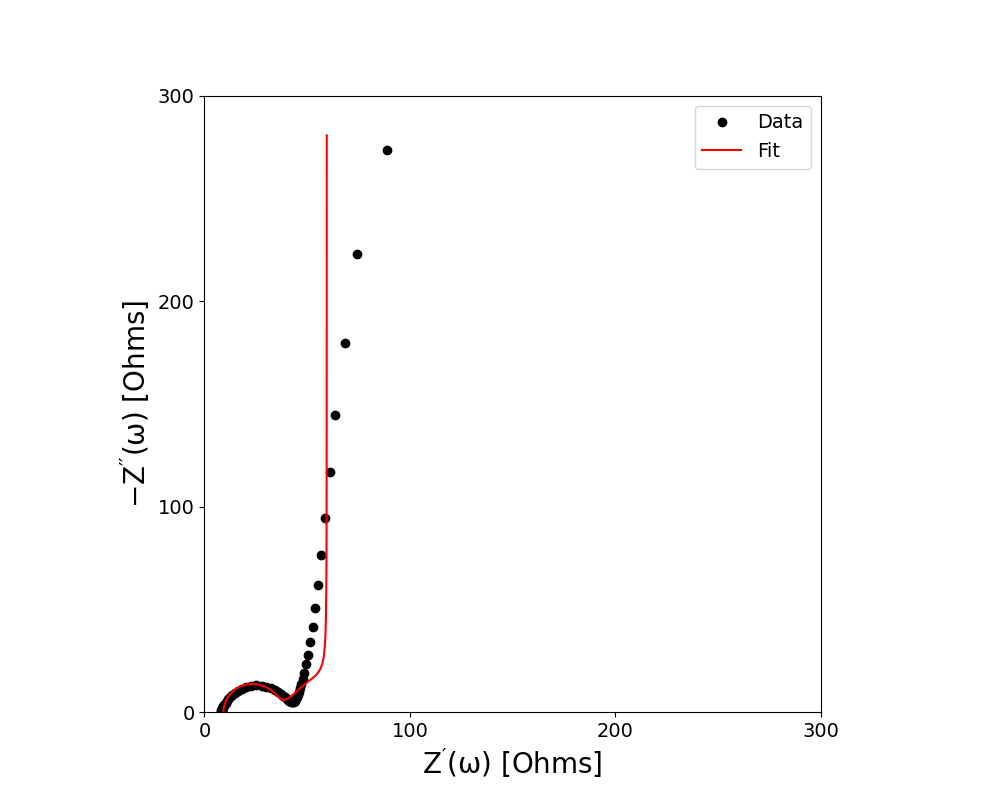

In [29]:
'''
Cell #6:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_1.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata1,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit1, fmt='-',ax=ax, color='r')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

<IPython.core.display.Javascript object>


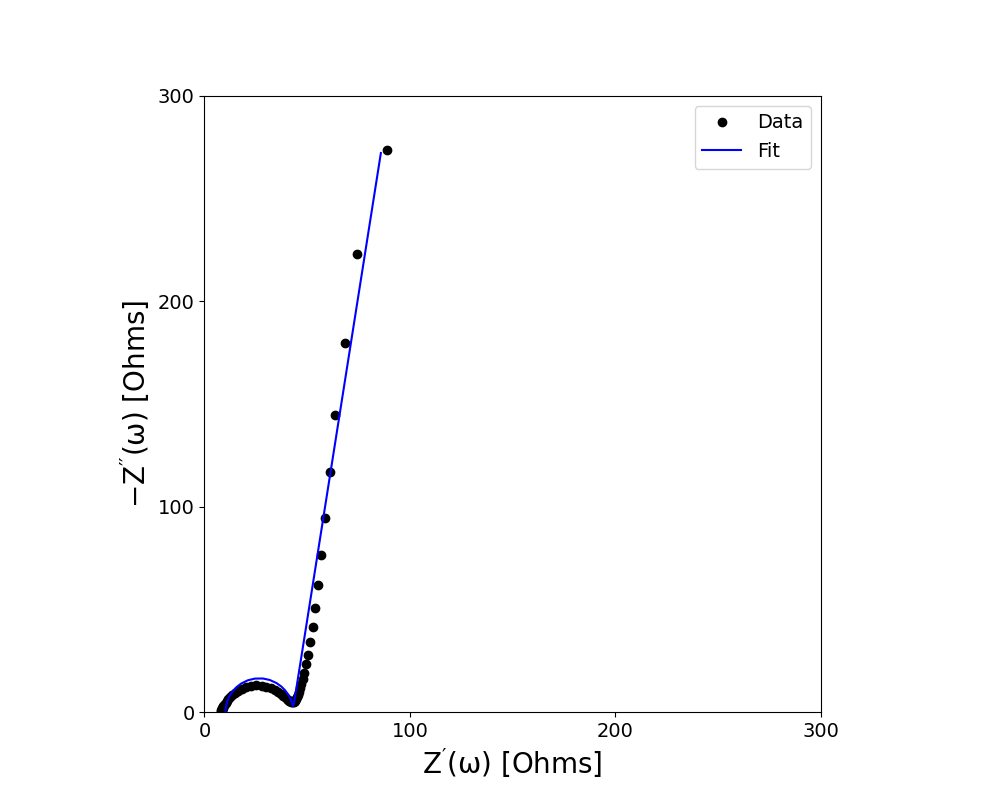

In [26]:
'''
Cell #7:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_2.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata2,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit2, fmt='-',ax=ax, color='b')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

<IPython.core.display.Javascript object>


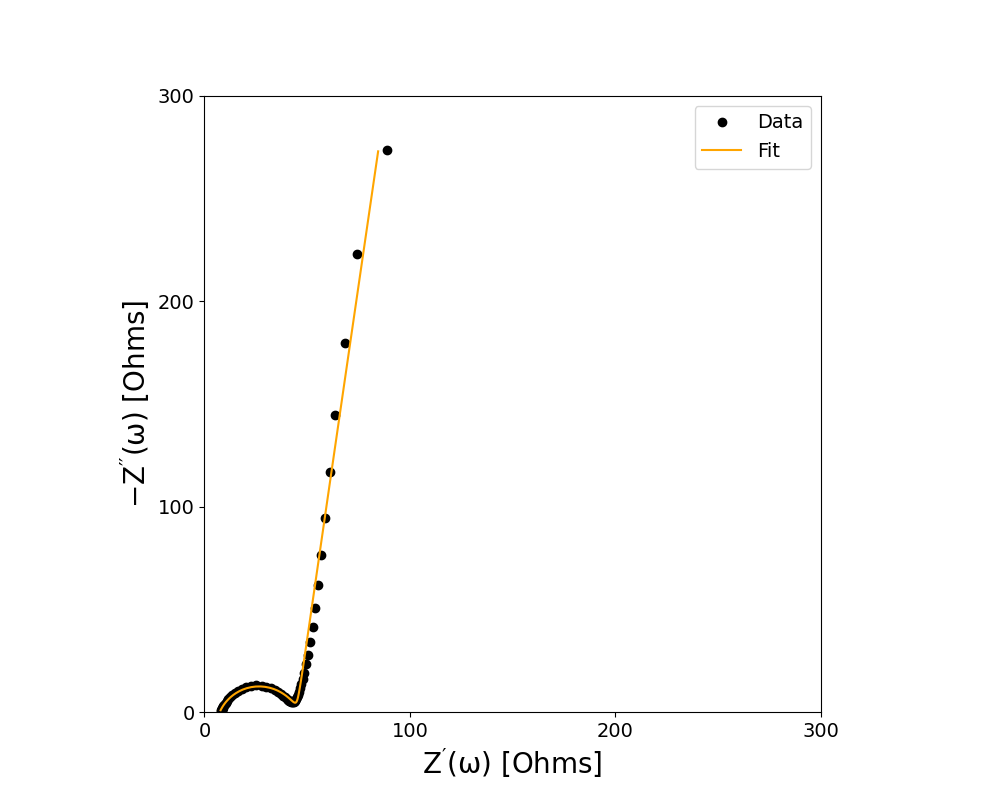

In [27]:
'''
Cell #8:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_3.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata3,fmt='o', ax=ax,color='k')
plot_nyquist(Zfit3, fmt='-',ax=ax, color='orange')



plt.grid(False)
plt.xlim(0,300)
plt.ylim(0,300)
plt.legend(['Data', 'Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

In [28]:
'''
Cell #9
This is the cell where you calculate the chi-squared for the EIS fitting with ECM_1, ECM_2, and ECM_3.
Action: Hit the 'Run' button.
'''
# Sample experimental and simulated EIS data
experimental_data1 = np.array([Zdata1], dtype=float)  # Replace [...] with your experimental data
simulated_data1 = np.array([Zfit1], dtype=float)     # Replace [...] with your simulated data

experimental_data2 = np.array([Zdata2], dtype=float)  # Replace [...] with your experimental data
simulated_data2= np.array([Zfit2], dtype=float)     # Replace [...] with your simulated data

experimental_data3 = np.array([Zdata3], dtype=float)  # Replace [...] with your experimental data
simulated_data3= np.array([Zfit3], dtype=float)     # Replace [...] with your simulated data

# Ensure both arrays are of the same shape and type
if experimental_data1.shape != simulated_data1.shape:
    raise ValueError("Experimental and simulated data must have the same shape.")
    
if experimental_data2.shape != simulated_data2.shape:
    raise ValueError("Experimental and simulated data must have the same shape.")
    
if experimental_data3.shape != simulated_data3.shape:
    raise ValueError("Experimental and simulated data must have the same shape.")

# Calculate chi-squared
chi_squared1 = np.sum(((experimental_data1 - simulated_data1) ** 2) / simulated_data1)
chi_squared2 = np.sum(((experimental_data2 - simulated_data2) ** 2) / simulated_data2)
chi_squared3 = np.sum(((experimental_data3 - simulated_data3) ** 2) / simulated_data3)

print("Chi-squared value:", chi_squared1, chi_squared2,chi_squared3)

Chi-squared value: 30.7073647329625 8.928264771068184 1.2477893588944886


<ipython-input-28-3ef7e850a141>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  experimental_data1 = np.array([Zdata1], dtype=float)  # Replace [...] with your experimental data
<ipython-input-28-3ef7e850a141>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  simulated_data1 = np.array([Zfit1], dtype=float)     # Replace [...] with your simulated data
<ipython-input-28-3ef7e850a141>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  experimental_data2 = np.array([Zdata2], dtype=float)  # Replace [...] with your experimental data
<ipython-input-28-3ef7e850a141>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  simulated_data2= np.array([Zfit2], dtype=float)     # Replace [...] with your simulated data
<ipython-input-28-3ef7e850a141>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  experimental_data3 = np.array([Zdata3], dtype=float)  